<img src="https://juniorworld.github.io/python-workshop-2018/img/portfolio/week9.png" width="350px">

---

# Unsupervised Machine Learning

- Train a model to give predictions only based on input data
- Dimension Reduction: PCA or SVD
- Clustering Analysis: Modularity, KMeans

## PCA: Principal Component Analysis
- Purpose: Dimension Reduction + Visualization
- Input: high-dimensional data
- Output: low-dimensional data
- Survey: 100 items -> 5 components

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
data=iris.data

In [5]:
data.shape

(150, 4)

In [7]:
iris.target[0]

0

In [8]:
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [10]:
pca = PCA(n_components=3) #initialize a PCA decomposer
pca.fit(data) #train this decomposer with current data set

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [12]:
iris_pca=pca.transform(data)

In [13]:
iris_pca.shape

(150, 3)

In [14]:
iris_pca[0,:]

array([-2.68412563,  0.31939725, -0.02791483])

In [15]:
#plot this matrix
import plotly.plotly as py
import plotly.graph_objs as go

py.sign_in('yunerzhu','IPqlBadz4qYbTEuOxbL5')

In [16]:
trace=go.Scatter3d(
                 x=iris_pca[:,0],
                 y=iris_pca[:,1],
                 z=iris_pca[:,2],
                 mode='markers',
                 marker={'size':3,'color':iris.target})
py.iplot([trace],filename='iris pca')

c:\users\yuner\appdata\local\programs\python\python36\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [18]:
trace=go.Scatter(
                 x=iris_pca[:,0],
                 y=iris_pca[:,1],
                 mode='markers',
                 marker={'size':5,'color':iris.target})
py.iplot([trace],filename='iris pca')

Try another data set...

In [19]:
! pip3 install matplotlib

You are using pip version 9.0.3, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
#load digits data
digits = load_digits()

digits is composed of three lists: image list, data list, and label list

<Figure size 432x288 with 0 Axes>

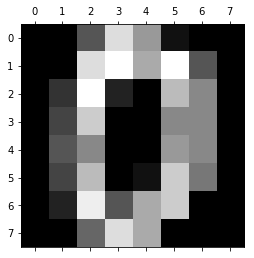

In [24]:
#"images" contains 8x8 images of each data point.
plt.gray() 
plt.matshow(digits.images[0])
plt.show() 

In [28]:
#"target" contains a list of results
digits.target[0]

0

In [29]:
#"data" contains brighness numbers of each data point
data=digits.data

In [30]:
data.shape #overall 1797 cases * 64 brightness number

(1797, 64)

In [31]:
data[0,:] #first case

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [36]:
#Find the minimum number of components which can explain over 80% of data variance
pca=PCA(n_components=15)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
pca = PCA(n_components=3) #specify the component number to 3
pca.fit(data)
digits_3d=pca.transform(data) #obtain the transformed data

In [48]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594])

In [42]:
digits_3d[0:5,:]

array([[ -1.25946638,  21.27488357,  -9.4630554 ],
       [  7.95761118, -20.768699  ,   4.43950644],
       [  6.99192297,  -9.95598641,   2.95855845],
       [-15.90610509,   3.33246439,   9.8243711 ],
       [ 23.30686717,   4.26906069,  -5.67512767]])

In [43]:
trace=go.Scatter3d(
        x=digits_3d[:,0],
        y=digits_3d[:,1],
        z=digits_3d[:,2],
        mode='markers',
        marker={'size':2,'color':digits.target,'colorscale':'Rainbow'},
        text=digits.target)
py.iplot([trace],filename='digits space')

c:\users\yuner\appdata\local\programs\python\python36\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [45]:
trace=go.Scatter(
        x=digits_3d[:,0],
        y=digits_3d[:,1],
        mode='markers',
        marker={'size':5,'color':digits.target,'colorscale':'Rainbow'},
        text=digits.target)
py.iplot([trace],filename='digits space')

---
## Break
---

## KMeans
- Purpose: cluster data points according to their euclidean distance
- Input: observation data
- Output: predicted groups
- Procedure:
    - STEP 1. Intialize K cluster centroids
    - STEP 2. Calculate the distance between each data point and each centroid
    - STEP 3. Assign data point to the cluster whose centroid is closest to it
    - STEP 4. Update the cluster centroids with new group
    - STEP 5. Repeat STEP 1~4 for specific time or until convergence

<h3 style="color: red">1. Step-by-Step Breakdowns</h3>

### STEP 1. Initialize K cluster centroids

In [51]:
#randomly pick K points as centroids
#Suppose: K=10
random_centroids_index=np.random.choice(range(data.shape[0]),10)

In [52]:
random_centroids_index

array([1266, 1375, 1192,  283, 1388,  160, 1741, 1538,  440,  622])

In [50]:
range(data.shape[0])

range(0, 1797)

In [58]:
random_centroids=data[random_centroids_index,:]

In [59]:
random_centroids.shape

(10, 64)

### STEP 2. Calculate the pairwise distance between data point and each centroid

**a) VECTOR NORM**

<img src="https://juniorworld.github.io/python-workshop-2018/img/vector_norm.png" width="200px" align='left'>

In [63]:
#According to Pythagorean theorem, if U=(U1,U2,U3,...,Un), ‖U‖=sqrt(U1^2 + U2^2 + U3^2 +...+ Un^2)
a=np.array([0,1,2,3])
norm=np.sqrt(sum([i**2 for i in a]))

In [66]:
np.sqrt(sum([i**2 for i in a]))

[0, 1, 4, 9]

In [64]:
norm

3.7416573867739413

In [62]:
np.power(3,2)

9

In [67]:
#SHORTCUT: Use np.linalg.norm() to calculate the vector norm
np.linalg.norm(a)

3.7416573867739413

**b) VECTOR SUBTRACTION**

<img src="https://juniorworld.github.io/python-workshop-2018/img/vector_minus.png" width="250px" align='left'>

In [68]:
a=np.array([0,1])
b=np.array([0,2])
np.linalg.norm(a-b)

1.0

In [69]:
#get the pairwise distance between first data point and first cluster's centroid
np.linalg.norm(data[0]-random_centroids[0])

46.06517122512408

In [82]:
#get the distance between all data and first centroid in one line
np.linalg.norm(data-random_centroids[0],axis=1).shape

(1797,)

### STEP 3. Pairwise Distance of digit data

In [76]:
np.argmin([2,1,3,4,5,6,7,8,9,10]) #index of smallest value

1

In [77]:
#Calculate the distance between each data point and each centroid, assign point to the cluster depending on this distance
#You need to get a list of cluster assignment
#HINT: you can use np.argmin() to find the index of minimum value
#----------------------------------
def single_run_KMeans(data,centroids):
    clusters=[] #initialization
    for i in data:
        distances=[] #a list for each data point
        for centroid in centroids: #go through every centroids
            distances.append(np.linalg.norm(i-centroid))
        clusters.append(np.argmin(distances))
    #Write your code here
    clusters=np.array(clusters)
    return(clusters)

In [83]:
def single_run_KMeans2(data,centroids):
    clusters=[] #initialization
    for i in data:
        distances=np.linalg.norm(i-centroids,axis=1)
        clusters.append(np.argmin(distances))
    #Write your code here
    clusters=np.array(clusters)
    return(clusters)

In [78]:
first_run_cluster=single_run_KMeans(data,random_centroids)

In [84]:
first_run_cluster #first point belongs to this cluster after first run

array([5, 7, 7, ..., 7, 4, 9], dtype=int64)

In [85]:
single_run_KMeans2(data,random_centroids)

array([5, 7, 7, ..., 7, 4, 9], dtype=int64)

### STEP 4. Update the centroids

Centroids: centers of a group of points/vectors
    - Measure: avarage of coordinates

<img src="https://juniorworld.github.io/python-workshop-2018/img/centroids.png" width="250px" align='left'>

In [86]:
a=[[1,2,3],
   [2,3,4],
   [4,5,6],
   [6,7,8]]
print(np.mean(a,axis=0)) #column mean
print(np.mean(a,axis=1)) #row mean

[3.25 4.25 5.25]
[2. 3. 5. 7.]


In [89]:
np.mean(a,axis=0).shape

(3,)

In [102]:
data[first_run_cluster==5,:] #points in cluster 5

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  0., 10., ...,  3.,  0.,  0.],
       ...,
       [ 0.,  0.,  9., ...,  4.,  0.,  0.],
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [98]:
first_run_cluster==0

array([False, False, False, ..., False, False, False])

In [106]:
a=[1,2,3]
a.append([3,4,5])
print(a)

[1, 2, 3, [3, 4, 5]]


In [107]:
a=[1,2,3]
a.extend([3,4,5])
print(a)

[1, 2, 3, 3, 4, 5]


In [176]:
#Update the centroids of clusters
def update_centroids(data,n_clusters,clusters):
    centroids=[]
    for i in range(n_clusters):
        centroids.append(np.mean(data[clusters==i,:],axis=0))
        #Write your code here
    centroids=np.array(centroids)
    return(centroids)

In [ ]:
data[first_run_cluster==0]

In [113]:
update_centroids(data,first_run_cluster) #get our second-run centroids

array([[0.00000000e+00, 1.33043478e+00, 1.06869565e+01, 1.42434783e+01,
        1.20086957e+01, 6.72173913e+00, 1.51304348e+00, 1.73913043e-02,
        0.00000000e+00, 4.35652174e+00, 1.35217391e+01, 1.27478261e+01,
        1.13130435e+01, 6.32173913e+00, 1.04347826e+00, 0.00000000e+00,
        1.73913043e-02, 3.80000000e+00, 9.38260870e+00, 6.99130435e+00,
        8.43478261e+00, 3.10434783e+00, 4.00000000e-01, 8.69565217e-03,
        8.69565217e-03, 2.33043478e+00, 9.03478261e+00, 1.16260870e+01,
        7.72173913e+00, 2.44347826e+00, 1.37391304e+00, 0.00000000e+00,
        0.00000000e+00, 1.53043478e+00, 9.42608696e+00, 1.46782609e+01,
        7.06086957e+00, 1.63478261e+00, 6.60869565e-01, 0.00000000e+00,
        0.00000000e+00, 7.82608696e-01, 6.93913043e+00, 1.24000000e+01,
        6.36521739e+00, 8.00000000e-01, 1.39130435e-01, 0.00000000e+00,
        0.00000000e+00, 1.43478261e+00, 9.45217391e+00, 1.19391304e+01,
        8.01739130e+00, 3.10434783e+00, 1.06956522e+00, 1.739130

### STEP 5. Calculate the Loss

Loss in Machine Learning = Goodness-of-fit in Social Sciences
- Types of loss: L1 (abs error), L2 (sqaured error) and logistic/cross-entropy
    - L1: mean(abs(y-ŷ))
    - L2: mean((y-ŷ)^2)
    - Log: mean(-sum(y*log(ŷ))
- For KMeans, we use L2 loss:
    - average squared distance between points and their centroids
    - formula: mean((y-centroid)^2)

In [175]:
def loss(data,n_clusters,clusters,centroids):
    ls=[]
    for i in range(n_clusters):
        ls.extend(np.linalg.norm(data[clusters==i,:]-centroids[i],axis=1)) #distance
    ls=np.mean([j**2 for j in ls]) #squared distance
    return(ls)

In [126]:
#performance of first run
loss(data,first_run_cluster,random_centroids)

1363.787979966611

### Training model for specific times (integrated)

In [127]:
centroids=random_centroids
loss_list=[]
for run in range(20):
    clusters=single_run_KMeans(data,centroids)
    current_loss=loss(data,clusters,centroids)
    print(run,current_loss)
    loss_list.append(current_loss)
    centroids=update_centroids(data,clusters)

0 1363.787979966611
1 789.9560542948624
2 725.5972554019689
3 691.0219991710748
4 675.8058224845905
5 668.3272164703228
6 665.2167085382956
7 662.9769950418288
8 661.0157214090037
9 659.7670030831385
10 658.8320880245899
11 657.7588307023788
12 656.2639585369155
13 655.5877328027624
14 655.2654891707729
15 655.0609552532225
16 654.9987559450808
17 654.9858214934817
18 654.9858214934817
19 654.9858214934817


In [128]:
#elbow method of finding the optimal number of iteration
trace=go.Scatter(
    x=list(range(20)),
    y=loss_list,
    mode='lines'
)
py.iplot([trace],filename='learning curve')

c:\users\yuner\appdata\local\programs\python\python36\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [131]:
#have a look at the cluster results
digits.target[clusters==2]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 8, 5, 8, 5, 5, 8, 5, 1, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5, 5, 5, 9, 9,
       5, 5, 5, 5, 5, 5, 5, 9, 9, 5, 5, 3, 5, 5, 5, 5, 5, 5, 3, 5])

### Training model until convergence (integrated)

In [132]:
centroids=random_centroids
current_loss=10000
loss_list=[]
while current_loss>700:
    clusters=single_run_KMeans(data,centroids)
    current_loss=loss(data,clusters,centroids)
    print(current_loss)
    loss_list.append(current_loss)
    centroids=update_centroids(data,clusters)

1363.787979966611
789.9560542948624
725.5972554019689
691.0219991710748


In [139]:
#centroids=random_centroids
previous_loss=10000 #intialization
ls_improvement=100 #intialization
while ls_improvement>0:
    clusters=single_run_KMeans(data,centroids)
    current_loss=loss(data,clusters,centroids)
    ls_improvement=previous_loss-current_loss
    print(current_loss)
    previous_loss=current_loss
    centroids=update_centroids(data,clusters)

1347.6099053978853
801.6459420976695
744.0509944684038
709.9453408940414
694.4442587019139
683.7608035555243
678.355620207011
676.775945811433
675.1954905387353
673.7478791266252
672.5163372612132
670.5952115521789
666.4148893310872
661.4045960362796
657.0103038300518
653.9478939181524
653.2936748233275
652.7613788083763
652.3765327188314
652.2907779210084
652.2685428301958
652.2576220931634
652.2458578654506
652.1889881465481
652.1613933470907
652.1540972362601
652.1540972362601


## KMeans++: An Improvement of KMeans

- New way of initialization
    - STEP 1: Random pick one centroid from the points
    - STEP 2: Calculate the distance _D(k)_ between points and their nearest centroid
    - STEP 3: Pick one more centroid with probability proportional to _D(k)_
    - STEP 4: Repeat STEP 2 and STEP 3 until the number of centroids reaching the required value

In [135]:
#STEP 1
first_centroid_index=np.random.choice(range(data.shape[0]),1)
first_centroid=data[first_centroid_index]

In [140]:
#HINT 1: You can use np.random.choice(data,1,p=[probability list]) to pick one point randomly with given list of probability
#HINT 2: You can use np.vstack((array1,array2)) to add new row
#WRITE YOUR CODE HERE
def kmeans_plus(data,n_clusters):
    first_centroid_index=np.random.choice(range(data.shape[0]),1)
    first_centroid=data[first_centroid_index]
    centroids=first_centroid
    for i in range(n_clusters-1): #create remaining 9 centroids
        prob=[]
        for j in data:
            distances=np.linalg.norm(j-centroids,axis=1) #distance between point and all available centroids
            distance=np.min(distances) #choose the minimum distance
            prob.append(distance)
        prob=prob/sum(prob) #convert the distance into probability, ranging between 0 and 1, with sum of 100%
        next_centroid_index=np.random.choice(range(data.shape[0]),1,p=prob)
        next_centroid=data[next_centroid_index,:]
        centroids=np.vstack((centroids,next_centroid)) #add new centroid to the list
    centroids=np.array(centroids)#convert the list to numpy array
    return(centroids)

In [154]:
def random_init(data,n_clusters):
    random_centroids_index=np.random.choice(range(data.shape[0]),n_clusters)
    random_centroids=data[random_centroids_index,:]
    return(random_centroids)

In [ ]:
centroids

# Combine everything into a giant function
- input: data
- parameter:init = random/kmeans++, iteration = num/covergence threshold
- output: a list of cluster assignments

In [177]:
def KMeans(data,n_clusters,init='random',iteration=10,convergence_threshold=False):
    if init=='random':
        centroids=random_init(data,n_clusters)
    elif init=='kmeans++':
        centroids=kmeans_plus(data,n_clusters)
    else:
        print('initialization error!')
    if type(iteration)==int:
        for run in range(iteration):
            clusters=single_run_KMeans(data,centroids)
            current_loss=loss(data,n_clusters,clusters,centroids)
            print(run,current_loss)
            centroids=update_centroids(data,n_clusters,clusters)
        return(clusters)
    if convergence_threshold:
        current_loss=10000
        while current_loss>700:
            clusters=single_run_KMeans(data,centroids)
            current_loss=loss(data,n_clusters,clusters,centroids)
            print(current_loss)
            centroids=update_centroids(data,n_clusters,clusters)
        return(clusters)

In [178]:
#APPLY Kmeans() to iris data
clusters=KMeans(iris.data,3)

0 1.2103333333333333
1 0.9677127629833691
2 0.9518278904097796
3 0.9516901334776336
4 0.9516901334776336
5 0.9516901334776336
6 0.9516901334776336
7 0.9516901334776336
8 0.9516901334776336
9 0.9516901334776336


## SHORTCUT: sklearn function

documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [142]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=10,init='k-means++',max_iter=20)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=20,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [143]:
kmeans.labels_

array([1, 7, 7, ..., 7, 8, 8])

In [144]:
digits.target[kmeans.labels_==1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

## Find the best value of K

In [ ]:
#a data set about development score of countries
countries=pd.read_csv('https://juniorworld.github.io/python-workshop-2018/doc/country-index.csv')

In [ ]:
countries.head()

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(countries.iloc[:,3:])

In [ ]:
countries['countries'][kmeans.labels_==0]

In [ ]:
ls_list=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(countries.iloc[:,3:])
    ls=loss(np.array(countries.iloc[:,3:]),kmeans.labels_,kmeans.cluster_centers_)
    ls_list.append(ls)

In [ ]:
#elbow method of finding the optimal K
trace=go.Scatter(
    x=list(range(1,21)),
    y=ls_list,
    mode='lines'
)
py.iplot([trace],filename='learning curve')